In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
spend_country = pd.read_csv("./data/spend/spend_country.csv", thousands=',')
spend_age = pd.read_csv("./data/spend/spend_age.csv", thousands=',')
spend_gender = pd.read_csv("./data/spend/spend_gender.csv", thousands=',')

satisfaction_country_2015 = pd.read_csv("./data/country/2015_country.csv", thousands=',')
satisfaction_country_2016 = pd.read_csv("./data/country/2016_country.csv", thousands=',')
satisfaction_country_2017 = pd.read_csv("./data/country/2017_country.csv", thousands=',')
satisfaction_country_2018 = pd.read_csv("./data/country/2018_country.csv", thousands=',')
satisfaction_country_2019 = pd.read_csv("./data/country/2019_country.csv", thousands=',')

satisfaction_age_2015 = pd.read_csv("./data/age/2015_age.csv")
satisfaction_age_2016 = pd.read_csv("./data/age/2016_age.csv")
satisfaction_age_2017 = pd.read_csv("./data/age/2017_age.csv")
satisfaction_age_2018 = pd.read_csv("./data/age/2018_age.csv")
satisfaction_age_2019 = pd.read_csv("./data/age/2019_age.csv")

satisfaction_gender_2015 = pd.read_csv("./data/gender/2015_gender.csv")
satisfaction_gender_2016 = pd.read_csv("./data/gender/2016_gender.csv")
satisfaction_gender_2017 = pd.read_csv("./data/gender/2017_gender.csv")
satisfaction_gender_2018 = pd.read_csv("./data/gender/2018_gender.csv")
satisfaction_gender_2019 = pd.read_csv("./data/gender/2019_gender.csv")

In [4]:
# ----- 만족도 데이터
satisfactionList = satisfaction_country_2015.iloc[:, 2:].values.tolist()
satisfactionList += satisfaction_country_2016.iloc[:, 2:].values.tolist()
satisfactionList += satisfaction_country_2017.iloc[:, 2:].values.tolist()
satisfactionList += satisfaction_country_2018.iloc[:, 2:].values.tolist()
satisfactionList += satisfaction_country_2019.iloc[:14, 2:].values.tolist()
satisfactionList += satisfaction_country_2019.iloc[14:, 2:].values.tolist()

satisfactionList += satisfaction_age_2015.iloc[:, 2:].values.tolist()
satisfactionList += satisfaction_age_2016.iloc[:, 2:].values.tolist()
satisfactionList += satisfaction_age_2017.iloc[:, 2:].values.tolist()
# satisfactionList += satisfaction_age_2018.iloc[:, 2:].values.tolist()
# satisfactionList += satisfaction_age_2019.iloc[:, 2:].values.tolist()

satisfactionList += satisfaction_gender_2015.iloc[:, 2:].values.tolist()
satisfactionList += satisfaction_gender_2016.iloc[:, 2:].values.tolist()
satisfactionList += satisfaction_gender_2017.iloc[:, 2:].values.tolist()
satisfactionList += satisfaction_gender_2018.iloc[:, 2:].values.tolist()
satisfactionList += satisfaction_gender_2019.iloc[:, 2:].values.tolist()

# ----- 소비량 데이터 
spendList = spend_country.iloc[:18, 2:3].values.tolist()
spendList += spend_country.iloc[:18, 3:4].values.tolist()
spendList += spend_country.iloc[:21, 4:5].values.tolist()
spendList += spend_country.iloc[:22, 5:6].values.tolist()
spendList += spend_country.iloc[:14, 6:7].values.tolist()
spendList += spend_country.iloc[15:, 6:7].values.tolist()

spendList += spend_age.iloc[:, 1:2].values.tolist()
spendList += spend_age.iloc[:, 2:3].values.tolist()
spendList += spend_age.iloc[:, 3:4].values.tolist()
# spendList += spend_age.iloc[:, 4:5].values.tolist()
# spendList += spend_age.iloc[:, 5:6].values.tolist()

spendList += spend_gender.iloc[:, 1:2].values.tolist()
spendList += spend_gender.iloc[:, 2:3].values.tolist()
spendList += spend_gender.iloc[:, 3:4].values.tolist()
spendList += spend_gender.iloc[:, 4:5].values.tolist()
spendList += spend_gender.iloc[:, 5:6].values.tolist()

# ----- 재방문의사 리스트
returnList = satisfaction_country_2015.iloc[:, 1:2].values.tolist()
returnList += satisfaction_country_2016.iloc[:, 1:2].values.tolist()
returnList += satisfaction_country_2017.iloc[:, 1:2].values.tolist()
returnList += satisfaction_country_2018.iloc[:, 1:2].values.tolist()
returnList += satisfaction_country_2019.iloc[:, 1:2].values.tolist()

returnList += satisfaction_age_2015.iloc[:, 1:2].values.tolist()
returnList += satisfaction_age_2016.iloc[:, 1:2].values.tolist()
returnList += satisfaction_age_2017.iloc[:, 1:2].values.tolist()
# returnList += satisfaction_age_2018.iloc[:, 1:2].values.tolist()
# returnList += satisfaction_age_2019.iloc[:, 1:2].values.tolist()

returnList += satisfaction_gender_2015.iloc[:, 1:2].values.tolist()
returnList += satisfaction_gender_2016.iloc[:, 1:2].values.tolist()
returnList += satisfaction_gender_2017.iloc[:, 1:2].values.tolist()
returnList += satisfaction_gender_2018.iloc[:, 1:2].values.tolist()
returnList += satisfaction_gender_2019.iloc[:, 1:2].values.tolist()

print(len(satisfactionList))
print(len(returnList))
print(len(spendList))

143
143
143


In [5]:
satisfaction_country_2015


,국가,재방문의사,만족도_치안,만족도_출입국절차,만족도_음식,만족도_여행경비,만족도_언어소통,만족도_숙박,만족도_쇼핑,만족도_대중교통,만족도_관광지매력도,만족도_관광안내서비스
0,일본,90.935,78.945,80.535,93.610,66.505,73.610,78.705,79.670,78.705,76.315,67.935
1,중국,91.065,98.715,95.935,90.450,88.750,84.915,95.225,96.865,95.225,93.700,93.540
2,홍콩,91.730,96.300,88.665,92.585,85.190,72.820,90.965,94.225,90.965,90.365,86.715
3,싱가포르,96.280,97.055,91.235,94.575,82.250,72.150,95.430,89.440,95.430,90.330,84.560
4,대만,90.435,95.560,95.020,93.735,84.330,81.895,94.300,96.610,94.300,95.170,93.480
5,태국,90.510,96.465,94.875,90.275,86.850,77.515,96.175,95.610,96.175,95.155,90.310
6,말레이시아,94.160,97.790,94.900,88.000,76.895,64.240,95.400,93.330,95.400,96.375,90.245
7,호주,92.210,99.085,93.935,95.530,88.330,81.825,96.915,79.610,96.915,88.115,76.195
8,미국,90.435,98.455,95.285,96.180,90.195,85.440,96.505,85.620,96.505,92.340,85.040
9,캐나다,87.700,98.165,95.555,95.685,89.115,80.675,95.420,85.820,95.420,89.475,80.045


In [6]:
esAsia = pd.DataFrame()
esAsia = pd.concat([satisfaction_country_2015.iloc[5:7, 2:], satisfaction_country_2016.iloc[5:7, 2:]])
esAsia = pd.concat([esAsia, satisfaction_country_2017.iloc[5:7, 2:]])
esAsia = pd.concat([esAsia, satisfaction_country_2017.iloc[18:, 2: ]])
esAsia = pd.concat([esAsia, satisfaction_country_2018.iloc[5:7, 2:]])
esAsia = pd.concat([esAsia, satisfaction_country_2018.iloc[18:21, 2:]])
esAsia = pd.concat([esAsia, satisfaction_country_2019.iloc[5:7, 2:]])
esAsia = pd.concat([esAsia, satisfaction_country_2019.iloc[17:20, 2:]])

esAsiaCorr = esAsia.corr()

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:title={'center':'다중공선성 확인'}>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


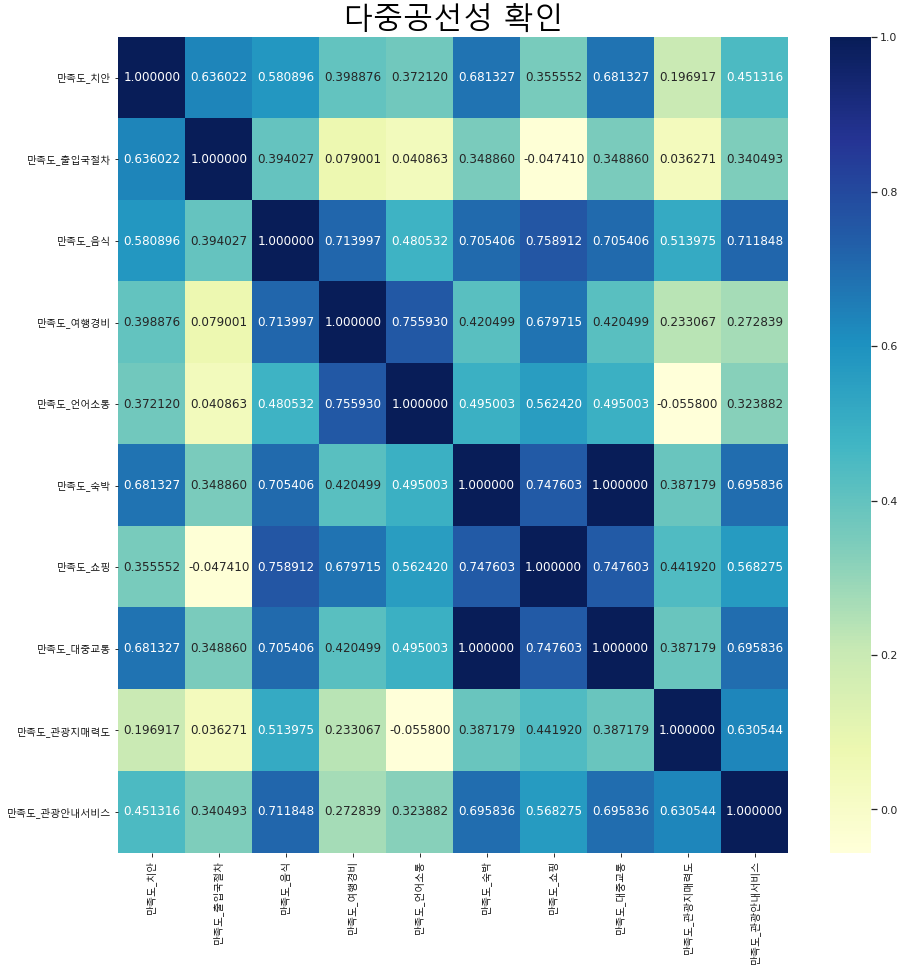

In [7]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('다중공선성 확인', fontsize=30)
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

sns.heatmap(esAsiaCorr,
            cmap='YlGnBu',
           annot=True,
           fmt='f',
           ax=ax)

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

esAsiaTemp = pd.DataFrame()

# esAsiaTemp = esAsia.iloc[:, 0:1]
esAsiaTemp = esAsia.iloc[:, 1:2]
# esAsiaTemp["만족도_출입국절차"] = esAsia.iloc[:, 1:2]
# esAsiaTemp["만족도_음식"] = esAsia.iloc[:, 2:3]
# esAsiaTemp["만족도_여행경비"] = esAsia.iloc[:, 3:4]
esAsiaTemp["만족도_언어소통"] = esAsia.iloc[:, 4:5]
# esAsiaTemp["만족도_숙박"] = esAsia.iloc[:, 5:6]
# esAsiaTemp["만족도_쇼핑"] = esAsia.iloc[:, 6:7]
# esAsiaTemp["만족도_대중교통"] = esAsia.iloc[:, 7:8]
esAsiaTemp["만족도_관광지매력도"] = esAsia.iloc[:, 8:9]
# esAsiaTemp["만족도_관광안내서비스"] = esAsia.iloc[:, 9:10]
esAsiaTemp
esAsiaCorr = esAsiaTemp.corr()
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(esAsiaCorr.values, i) for i in range(esAsiaCorr.shape[1])]
vif["feature"] = esAsiaCorr.columns
vif


<ipython-input-8-3c43038d9884>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esAsiaTemp["만족도_언어소통"] = esAsia.iloc[:, 4:5]
<ipython-input-8-3c43038d9884>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esAsiaTemp["만족도_관광지매력도"] = esAsia.iloc[:, 8:9]


,VIF Factor,feature
0,1.012733,만족도_출입국절차
1,1.020026,만족도_언어소통
2,1.018588,만족도_관광지매력도


In [9]:
# esAsiaSatisfaction = satisfaction_country_2015.iloc[5:7, 2:].values.tolist() # 2015 태국 말레이시아
# esAsiaSatisfaction += satisfaction_country_2016.iloc[5:7, 2:].values.tolist() # 2016 태국 말레이시아
# esAsiaSatisfaction += satisfaction_country_2017.iloc[5:7, 2:].values.tolist() # 2017 태국 말레이시아
# esAsiaSatisfaction += satisfaction_country_2017.iloc[18:, 2: ].values.tolist() # 2017 태국 말레이시아
# esAsiaSatisfaction += satisfaction_country_2018.iloc[5:7, 2:].values.tolist() # 2018 태국 말레이시아
# esAsiaSatisfaction += satisfaction_country_2018.iloc[18:21, 2:].values.tolist() # 2018 필리핀 인도네시아 베트남
# esAsiaSatisfaction += satisfaction_country_2019.iloc[5:7, 2:].values.tolist() # 2019 태국 말레이시아
# esAsiaSatisfaction += satisfaction_country_2019.iloc[17:20, 2:].values.tolist() # 2019 필리핀 인도네시아 베트남



In [516]:
esAsiaSatisfaction = esAsiaTemp.values.tolist()

esAsiaReturn = satisfaction_country_2015.iloc[5:7, 1:2].values.tolist()
esAsiaReturn += satisfaction_country_2016.iloc[5:7, 1:2].values.tolist()
esAsiaReturn += satisfaction_country_2017.iloc[5:7, 1:2].values.tolist()
esAsiaReturn += satisfaction_country_2017.iloc[18:, 1:2].values.tolist()
esAsiaReturn += satisfaction_country_2018.iloc[5:7, 1:2].values.tolist()
esAsiaReturn += satisfaction_country_2018.iloc[18:21, 1:2].values.tolist()
esAsiaReturn += satisfaction_country_2019.iloc[5:7, 1:2].values.tolist()
esAsiaReturn += satisfaction_country_2019.iloc[17:20, 1:2].values.tolist()

esAsiaSpend = spend_country.iloc[5:7, 2:3].values.tolist() # 2015
esAsiaSpend += spend_country.iloc[5:7, 3:4].values.tolist() # 2016
esAsiaSpend += spend_country.iloc[5:7, 4:5].values.tolist() # 2017
esAsiaSpend += spend_country.iloc[18:21, 4:5].values.tolist() # 2017
esAsiaSpend += spend_country.iloc[5:7, 5:6].values.tolist() # 2018
esAsiaSpend += spend_country.iloc[18:21, 5:6].values.tolist() # 2018
esAsiaSpend += spend_country.iloc[5:7, 6:7].values.tolist() # 2019
esAsiaSpend += spend_country.iloc[18:21, 6:7].values.tolist() # 2019


In [166]:
while True:
    train_data, test_data, train_label, test_label = train_test_split(esAsiaSatisfaction,
                                                                 esAsiaReturn,
                                                                 test_size = 0.3
                                                                 )
    model = LinearRegression()
    model.fit(train_data, train_label)
    predict = model.predict(test_data)
    r2_score = model.score(test_data, test_label)
    if r2_score > 0.9:
        print(r2_score)
        break

0.9328809900817414
[[91.15], [94.16], [93.13], [97.14], [89.735], [94.92]]
----------
[[90.70890079]
 [94.22319796]
 [93.71222759]
 [96.29826849]
 [90.7991387 ]
 [94.90754812]]
----------


In [167]:
import joblib

joblib.dump(model, './model/esAsiaSatisfaction_esAsiaReturn_model.pkl')

['./model/esAsiaSatisfaction_esAsiaReturn_model.pkl']

In [169]:
model = joblib.load('./model/esAsiaSatisfaction_esAsiaReturn_model.pkl')


In [170]:
train_data, test_data, train_label, test_label = train_test_split(esAsiaSatisfaction,
                                                                 esAsiaReturn,
                                                                 test_size = 0.3
                                                                 )
model = LinearRegression()
model.fit(train_data, train_label)
predict = model.predict(test_data)
r2_score = model.score(test_data, test_label)


In [361]:
print(esAsiaSpend)
for i in range(0,len(esAsiaSpend)):
    esAsiaSpend[i][0] = esAsiaSpend[i][0] / 1233.2
    
print(esAsiaSpend)
    

[[0.8565520596821278], [0.8956373662017515], [0.912017515407071], [0.8373337658125202], [0.9545896853713915], [0.9241809925397341], [0.7956535841712618], [0.9750243269542653], [0.9840253000324359], [0.929930262731106], [0.8400340577359715], [0.78284138825819], [0.9135095686020109], [0.976646123905287], [0.7665747648394421], [0.7676775867661368], [0.6548410638987998], [1.0], [1.0343820953616607]]
[[0.0006945767593919297], [0.0007262709748635675], [0.0007395536128828016], [0.0006789926741911451], [0.0007740753206060587], [0.0007494169579465894], [0.0006451942784392327], [0.0007906457403132219], [0.0007979446156604249], [0.000754079032380073], [0.0006811823367953061], [0.0006348048883053763], [0.0007407635165439595], [0.0007919608529883936], [0.0006216143081734042], [0.000622508584792521], [0.0005310096204174504], [0.000810898475510866], [0.0008387788642245059]]


-0.1782538930878168


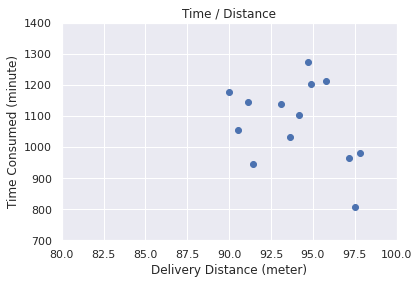

In [572]:
train_data, test_data, train_label, test_label = train_test_split(esAsiaReturn,
                                                                 esAsiaSpend,
                                                                 test_size = 0.3
                                                                 )
model = LinearRegression()
model.fit(train_data, train_label)
predict = model.predict(test_data)
r2_score = model.score(test_data, test_label)


print(r2_score)
# print(train_label)
# print(predict)
plt.scatter(train_data, train_label) 
plt.title("Time / Distance")
plt.xlabel("Delivery Distance (meter)")
plt.ylabel("Time Consumed (minute)")
plt.axis([80, 100, 700, 1400])
plt.show()

In [575]:
print(esAsiaReturn)
print(esAsiaSpend)

[[90.51], [94.16], [89.735], [93.62], [89.99], [93.13], [97.79], [85.65], [95.795], [91.15], [93.58], [97.14], [94.56], [94.92], [91.4], [93.07], [97.52], [96.595], [94.73]]
[[1056.3], [1104.5], [1124.7], [1032.6], [1177.2], [1139.7], [981.2], [1202.4], [1213.5], [1146.79], [1035.93], [965.4], [1126.54], [1204.4], [945.34], [946.7], [807.55], [1233.2], [1275.6]]
